In [26]:
import matplotlib.pyplot as plt #for visualisation of complex data
import seaborn as sns #for visualisation of 
import numpy as np  # linear algebraa
import pandas as pd # data processing
from sklearn.linear_model import LinearRegression,LogisticRegression#for algo of linear regression
from sklearn.metrics import mean_squared_error,r2_score #for evaluation of prediction model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Seaborn Settings
sns.set_theme()
sns.set_style('whitegrid')

In [3]:
data = pd.read_csv("ipl.csv")       # Data Loading
df = pd.DataFrame(data)

In [4]:
#Displaying the first few rows of the dataset
print("First few values: \n")
df.head()

First few values: 



,PLAYER,Mat.x,Inns.x,NO,Runs.x,HS,Avg.x,BF,SR.x,X100,...,Ov,Runs.y,Wkts,BBI,Avg.y,Econ,SR.y,X4w,X5w,y
0,Aaron Finch,10,9,1,134,46,16.75,100,134.00,0,...,0.0,0,0,0,0,0.0,0,0,0,0
1,AB de Villiers,12,11,2,480,90,53.33,275,174.54,0,...,0.0,0,0,0,0,0.0,0,0,0,0
2,Abhishek Sharma,3,3,2,63,46,63,33,190.90,0,...,0.0,0,0,0,0,0.0,0,0,0,0
3,Ajinkya Rahane,15,14,1,370,65,28.46,313,118.21,0,...,0.0,0,0,0,0,0.0,0,0,0,0
4,Alex Hales,6,6,0,148,45,24.66,118,125.42,0,...,0.0,0,0,0,0,0.0,0,0,0,0


In [5]:
#Displaying the first few rows of the dataset
print("First few values: \n")
df.tail()

First few values: 



,PLAYER,Mat.x,Inns.x,NO,Runs.x,HS,Avg.x,BF,SR.x,X100,...,Ov,Runs.y,Wkts,BBI,Avg.y,Econ,SR.y,X4w,X5w,y
138,Siddarth Kaul,0,0,0,0,0,0,0,0.0,0,...,66.0,547,21,0,26.04,8.28,18.85,0,0,0
139,Trent Boult,0,0,0,0,0,0,0,0.0,0,...,52.4,466,18,0,25.88,8.84,17.55,0,0,0
140,Umesh Yadav,0,0,0,0,0,0,0,0.0,0,...,53.1,418,20,0,20.9,7.86,15.95,0,0,0
141,Vi0y Kumar,0,0,0,0,0,0,0,0.0,0,...,3.5,65,2,0,32.5,16.95,11.5,0,0,0
142,Yuzvendra Chahal,0,0,0,0,0,0,0,0.0,0,...,50.0,363,12,0,30.25,7.26,25,0,0,0


In [6]:
#Displaying the information about the dataset
df.info()
print()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PLAYER  143 non-null    object 
 1   Mat.x   143 non-null    int64  
 2   Inns.x  143 non-null    int64  
 3   NO      143 non-null    int64  
 4   Runs.x  143 non-null    int64  
 5   HS      143 non-null    int64  
 6   Avg.x   143 non-null    object 
 7   BF      143 non-null    int64  
 8   SR.x    143 non-null    float64
 9   X100    143 non-null    int64  
 10  X50     143 non-null    int64  
 11  X4s     143 non-null    int64  
 12  X6s     143 non-null    int64  
 13  Mat.y   143 non-null    int64  
 14  Inns.y  143 non-null    int64  
 15  Ov      143 non-null    float64
 16  Runs.y  143 non-null    int64  
 17  Wkts    143 non-null    int64  
 18  BBI     143 non-null    int64  
 19  Avg.y   143 non-null    object 
 20  Econ    143 non-null    float64
 21  SR.y    143 non-null    object 
 22  X4

In [7]:
print("null values:")    #  printing null values
df.isnull().sum()

null values:


PLAYER    0
Mat.x     0
Inns.x    0
NO        0
Runs.x    0
HS        0
Avg.x     0
BF        0
SR.x      0
X100      0
X50       0
X4s       0
X6s       0
Mat.y     0
Inns.y    0
Ov        0
Runs.y    0
Wkts      0
BBI       0
Avg.y     0
Econ      0
SR.y      0
X4w       0
X5w       0
y         0
dtype: int64

In [8]:
## Identifing number of missing values
missing = df.isna().sum()
missing_count = missing[missing!=0]
print("Count of missing values")
print(missing_count,'\n')
print("Percentage of missing data: ")
print(missing_count / df.shape[0] * 100)

Count of missing values
Series([], dtype: int64) 

Percentage of missing data: 
Series([], dtype: float64)


### Aditional Information

In [9]:
# Number of balls bowled
# 'Overs' = "Overs" + "Balls" / 10 | eg. 57.3 = 57 overs + 3 balls
number_of_balls_bowled = ((df['Ov']).astype(int) * 6 + ((df['Ov'] * 10) % 10)).astype(int)
df['Balls_Bowled'] = number_of_balls_bowled

In [10]:
df.info(verbose=True)  # new data after exchanging coloumns name

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PLAYER        143 non-null    object 
 1   Mat.x         143 non-null    int64  
 2   Inns.x        143 non-null    int64  
 3   NO            143 non-null    int64  
 4   Runs.x        143 non-null    int64  
 5   HS            143 non-null    int64  
 6   Avg.x         143 non-null    object 
 7   BF            143 non-null    int64  
 8   SR.x          143 non-null    float64
 9   X100          143 non-null    int64  
 10  X50           143 non-null    int64  
 11  X4s           143 non-null    int64  
 12  X6s           143 non-null    int64  
 13  Mat.y         143 non-null    int64  
 14  Inns.y        143 non-null    int64  
 15  Ov            143 non-null    float64
 16  Runs.y        143 non-null    int64  
 17  Wkts          143 non-null    int64  
 18  BBI           143 non-null    

In [11]:
## Identifing number of missing values
missing = df.isna().sum()
missing_count = missing[missing!=0]

print("Count of missing values")
print(" ")
print(missing_count,'\n')
print("Percentage of missing data: ")
print(" ")
print(missing_count / df.shape[0] * 100)

Count of missing values
 
Series([], dtype: int64) 

Percentage of missing data: 
 
Series([], dtype: float64)


### Centuries Hits in The Innnings

Text(0.5, 1.0, 'century hit in the innings')

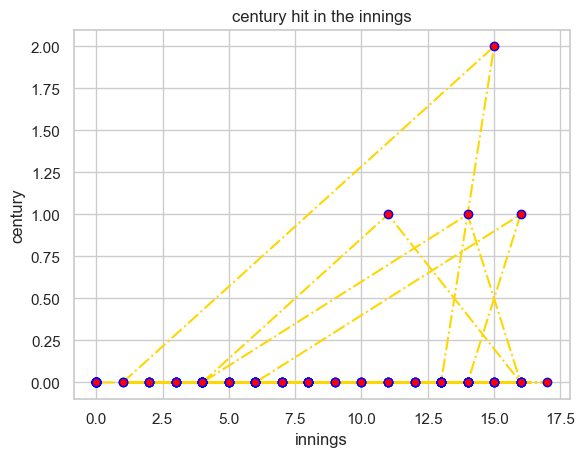

In [12]:
plt.plot(data['Inns.x'],data['X100'],marker='o',linestyle='dashdot',color='gold',markerfacecolor='red',markeredgecolor='blue',
        )       #plot(x axis,y axis)
plt.xlabel('innings')
plt.ylabel('century')
plt.title('century hit in the innings')

### Top 10 Run Scores

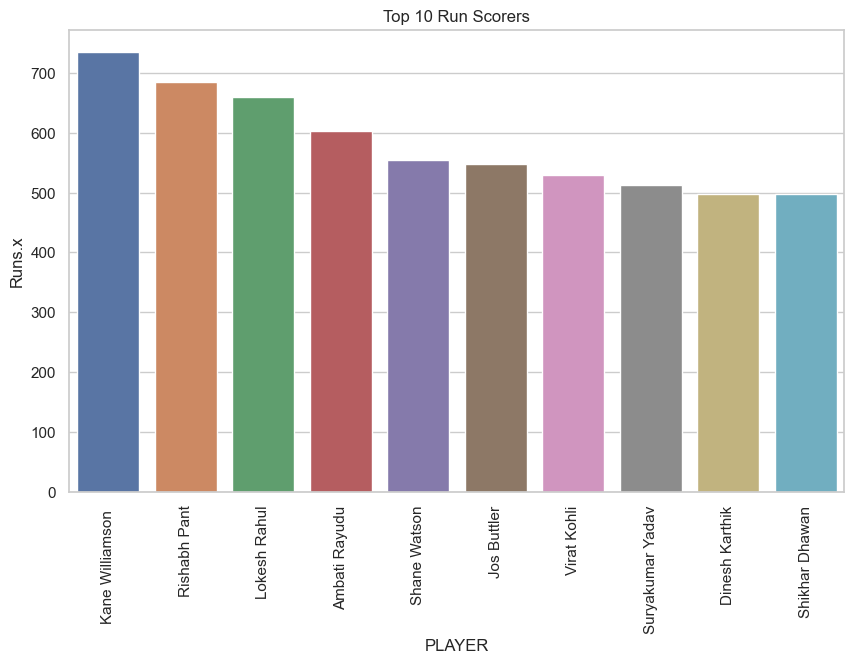

In [13]:
top_10_scores = df.sort_values(by='Runs.x',ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=top_10_scores,x='PLAYER',y='Runs.x',hue='PLAYER')
plt.xticks(rotation=90)
plt.title("Top 10 Run Scorers")
plt.show()

### Distribution of Batsman, Bowler, and All-rounders

### Status For Wickets

(array([], dtype=float64), [])

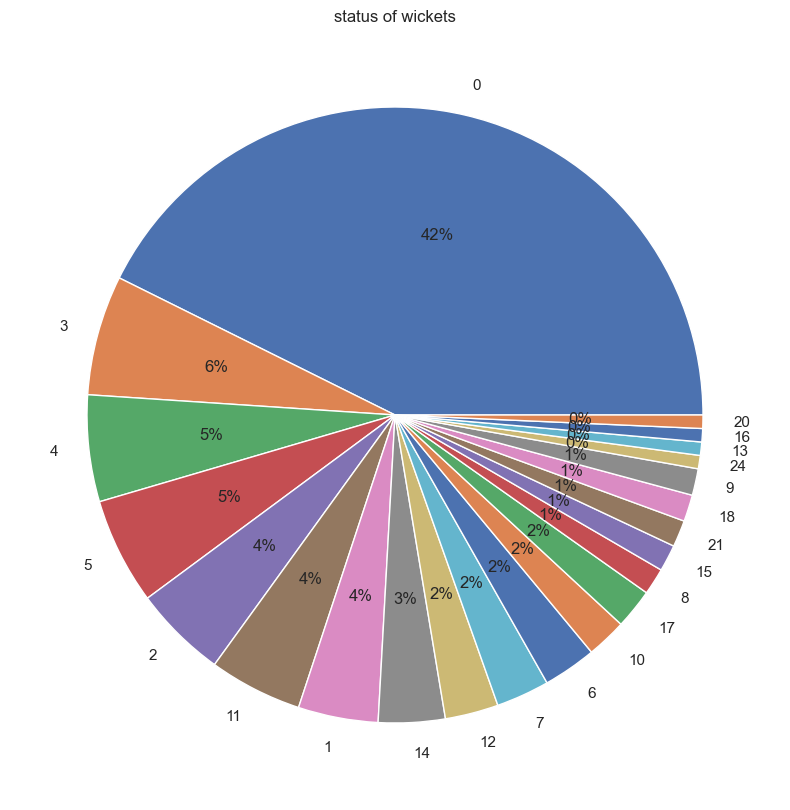

In [14]:
plt.figure(figsize=(13,10))
mode_count=df['Wkts'].value_counts() 
plt.pie(mode_count,labels=mode_count.index,autopct='%d%%')   
plt.title('status of wickets')
plt.xticks(rotation=40)

### Scater Plot for Inning Batted WRT Overs

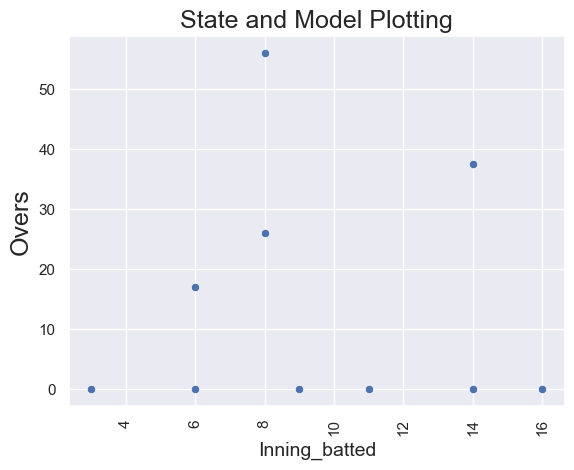

In [15]:
data = df.iloc[0:10]  
sns.set_theme(style='darkgrid')
sns.scatterplot(x='Inns.x', y='Ov', data=data)
plt.xticks(rotation=90)
plt.title('State and Model Plotting', fontsize=18)
plt.xlabel('Inning_batted', fontsize=14)
plt.ylabel('Overs', fontsize=18)
plt.show()

### Distribution of Runs Using Histo plot

Text(0.5, 1.0, 'Distribution in year')

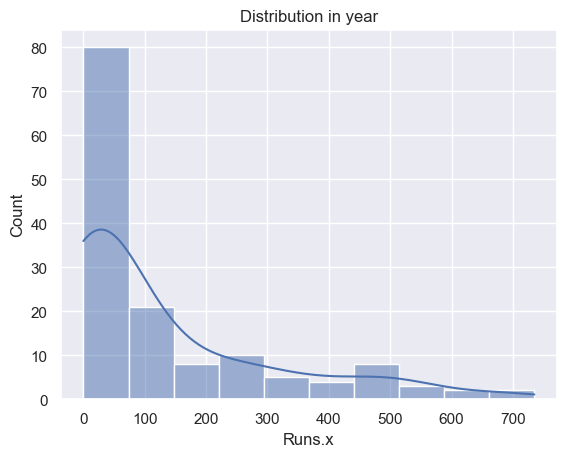

In [16]:
sns.histplot(df['Runs.x'],bins=10,kde=True)
plt.title('Distribution in year')

### Wikets taken by the Players

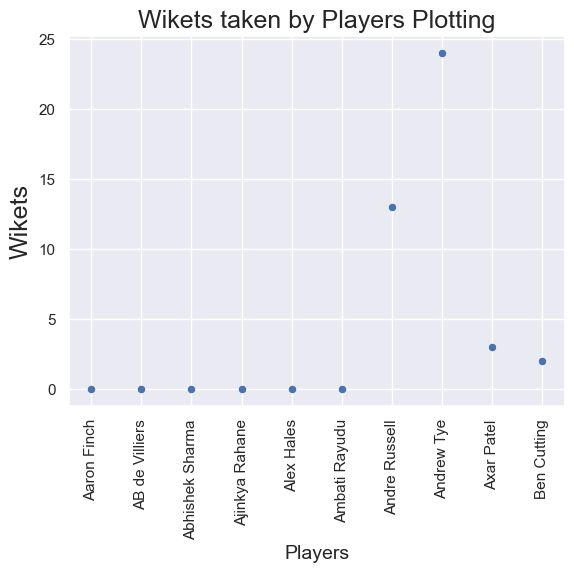

In [17]:
data = df.iloc[0:10]  
sns.set_theme(style='darkgrid')
sns.scatterplot(x='PLAYER', y='Wkts', data=data)
plt.xticks(rotation=90)
plt.title('Wikets taken by Players Plotting', fontsize=18)
plt.xlabel('Players', fontsize=14)
plt.ylabel('Wikets', fontsize=18)
plt.show()

### Heatmap for century vs halfcentury

Text(0.5, 1.0, 'correlation Matrix')

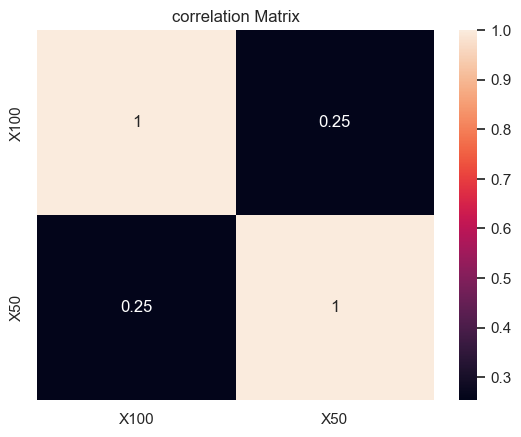

In [18]:
sns.heatmap(df[['X100','X50']].corr(),annot=True)
plt.title('correlation Matrix')

### Bar graph players vs century

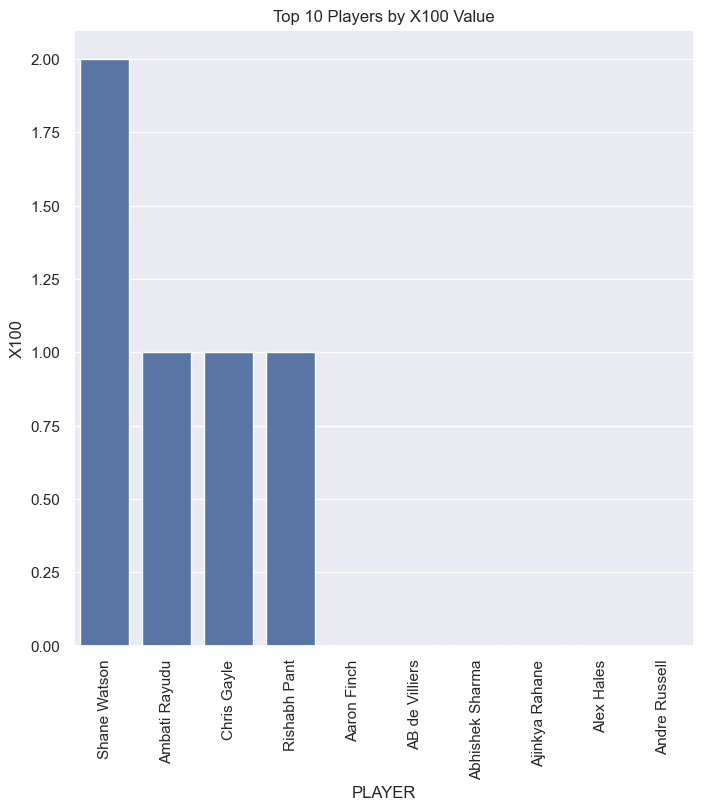

In [19]:
top_10_df = df.nlargest(10, 'X100')   # for top 10 players
plt.figure(figsize=(8, 8))
sns.barplot(x='PLAYER', y='X100', data=top_10_df)
plt.xticks(rotation=90)
plt.title('Top 10 Players by X100 Value')
plt.show()

### Predictions

In [20]:
#Deciding label and features
X=df[['X6s','X4s','X100','X50']]
Y=df['Runs.x']

In [21]:
#Splitting the data into training and testing
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [22]:
#model training
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [23]:
#predicting the values
y_pred=model.predict(x_test)

In [24]:
#evaluate
r2=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
print("r2 is: ",r2,"mse is",mse)

r2 is:  0.9736627883815259 mse is 647.1452017217883


In [25]:
data = {
    'x6s': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'x4s': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
    'score': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
}
df = pd.DataFrame(data)

# Define and fit the scaler
scaler = StandardScaler()
X = df[['x6s', 'x4s']]
y = df['score']
X_scaled = scaler.fit_transform(X)

# Define and fit the model
model = LinearRegression()
model.fit(X_scaled, y)

# Function to get user input
def get_user_input():
    try:
        x6s = int(input("Enter number of sixes: "))
        x4s = int(input("Enter number of fours: "))
        return pd.DataFrame({'x6s': [x6s], 'x4s': [x4s]})
    except ValueError:
        print("Invalid input! Please enter valid integers.")
        return get_user_input()

# Get user input
new_data = get_user_input()

# Scale the new data
new_data_scaled = scaler.transform(new_data)

# Make a prediction
new_prediction = model.predict(new_data_scaled)

print("Predicted score: ", new_prediction[0])

Enter number of sixes:  3
Enter number of fours:  5


Predicted score:  35.0
